# IPython Simulation for the toilet-paper problem proposed by Knuth in 1984

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import random
import statistics

## 2-roll case

In [11]:
def leftOver(num,p):
    """
    Simulate a random process of the toilet paper problem
    ---input---
    int num: the number of toilet paper in the beginning
    float p: the proportion of big-chooser in the population
    ---return---
    int: the number of non-used toilet paper on the other roll of toilet paper when one roll is emptied
    """
    n=num
    m=num
    while (n*m>0):
        if (m==n):
            t=random.random()
            if (t<0.5):
                n=n-1
            else:
                m=m-1
        else:
            r = random.random()
            if (r<p):
                if (n<m):
                    m=m-1
                else:
                    n=n-1
            else:
                if (n>m):
                    m=m-1
                else:
                    n=n-1
                
    return max(m,n)
def simulation(trial,num,p):
    """
    Simulate the toilet paper many times
    ---input---
    int trial: the number of simulation times
    int num: the number of toilet paper in the beginning
    float p: the proportion of big-chooser in the population
    ---return---
    list: a list of size trial containing all results of the simulation
    """
    res=[]
    for i in range(trial):
        res.append(leftOver(num,p))
    return res

In [12]:
def Mnp(num):
    """
    Generate the mean amount of leftover paper (using a step of 1/2000) for all possible big-chooser proportion in interval [0,1). The mean is calculated by 500 simulations for each p.
    ---input---
    int num: the number of toilet paper in the beginning
    ---return---
    dictionary: 'mean': a list of mean value for leftover paper at different p; 'sdv': a list of standard deviation value for leftover paper at different p; 'upper': a list recording mean+2*stv (upper bound in a possible confidence interval) for leftover paper at different p; 'lower': a list recording mean-2*stv (lower bound in a possible confidence interval) for leftover paper at different p
    """
    meanlist = []
    medianlist = []
    stvlist = []
    for t in np.linspace (0,1,2000):
        res = simulation(500,num,t)
        meanlist.append(statistics.mean(res))
        medianlist.append(statistics.median(res))
        stvlist.append(statistics.stdev(res))
    meanlist=np.array(meanlist)
    stvlist=np.array(stvlist)
    upper = meanlist+2*stvlist
    lower = meanlist-2*stvlist
    return {'mean':meanlist, 'sdv': stvlist, 'upper': upper, 'lower': lower}

Histogram of 4000 simulations of toilet paper problem with a initial length of 100 and p=0.2

(0, 10)

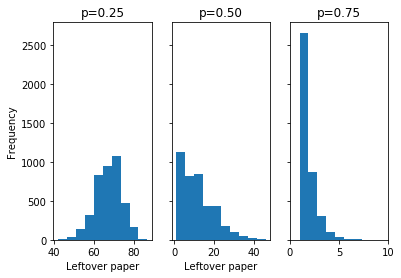

In [30]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,sharey=True)
ax1.hist(simulation(4000,100,0.25))
ax1.set_title('p=0.25')
ax1.set_xlabel('Leftover paper')
ax1.set_ylabel('Frequency')

ax2.hist(simulation(4000,100,0.50))
ax2.set_title('p=0.50')
ax2.set_xlabel('Leftover paper')

ax3.hist(simulation(4000,100,0.75))
ax3.set_title('p=0.75')
ax2.set_xlabel('Leftover paper')
ax3.set_xlim(0, 10)



In [4]:
meanlist = []
medianlist = []
stvlist = []
for t in np.linspace (0,1,2000):
    res = simulation(500,100,t)
    meanlist.append(statistics.mean(res))
    medianlist.append(statistics.median(res))
    stvlist.append(statistics.stdev(res))
meanlist=np.array(meanlist)
stvlist=np.array(stvlist)
upper = meanlist+2*stvlist
lower = meanlist-2*stvlist

In [14]:
dic100=Mnp(100)
dic50=Mnp(50)
dic10=Mnp(10)

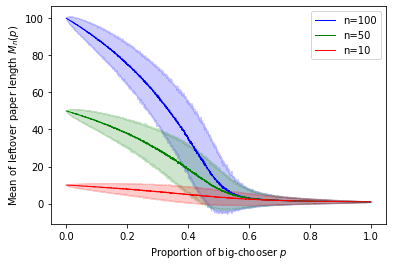

In [19]:
t=np.linspace(0,1,2000)
fig, ax = plt.subplots()
ax.plot(np.linspace(0,1,2000),dic100['mean'],'b', label='n=100', linewidth=1)
ax.fill_between(np.linspace(0,1,2000),dic100['lower'],dic100['upper'],
color='blue',alpha=0.2)
ax.plot(np.linspace(0,1,2000),dic50['mean'],'g', label='n=50', linewidth=1)
ax.fill_between(np.linspace(0,1,2000),dic50['lower'],dic50['upper'],
color='green',alpha=0.2)
ax.plot(np.linspace(0,1,2000),dic10['mean'],'r', label='n=10', linewidth=1)
ax.fill_between(np.linspace(0,1,2000),dic10['lower'],dic10['upper'],
color='red',alpha=0.2)
ax.set_xlabel(r'Proportion of big-chooser $p$')
ax.set_ylabel(r'Mean of leftover paper length $M_n(p)$')
ax.legend()
plt.show()

In [54]:
def approxM(n,p):
    """
    approximate the value of M_n(p) when n is large using the approximation given in Knuth's paper
    ---input---
    float p: the proportion of big-chooser
    int n: initial size of toilet paper
    ---returns---
    float: value of M_n(p) approximated using Knuth's method in a piecewise function
    """
    if (p<(1/2-0.4*n**(-0.5))):
        res = (1-2*p)*n/(1-p)+p/(1-2*p)
    else:
        if (p-(1/2+0.5*n**(-0.5))>0):
            res = p/(2*p-1)
        else:
            res = 2*(n/np.pi)**0.5-1/4 *(1/(np.pi*n))**0.5
    return res

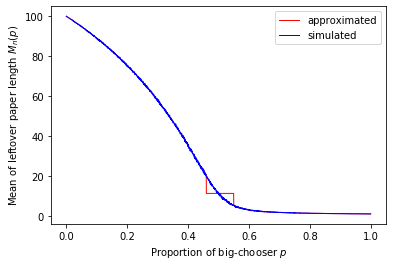

In [57]:
approxres = []
for p in np.linspace(0,1,2000):
    approxres.append(approxM(100,p))
t=np.linspace(0,1,2000)
fig, ax = plt.subplots()
ax.plot(t,approxres,'r-',label='approximated',linewidth = 1)
ax.plot(t,dic100['mean'],'b',label='simulated',linewidth = 1)
ax.set_xlabel(r'Proportion of big-chooser $p$')
ax.set_ylabel(r'Mean of leftover paper length $M_n(p)$')
ax.legend()
plt.show()

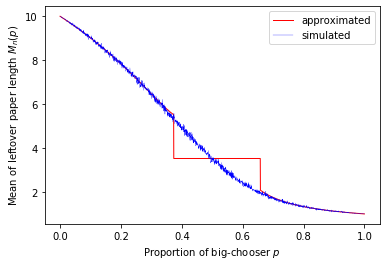

In [61]:
approxres = []
for p in np.linspace(0,1,2000):
    approxres.append(approxM(10,p))
t=np.linspace(0,1,2000)
fig, ax = plt.subplots()
ax.plot(t,approxres,'r-',label='approximated',linewidth = 1)
ax.plot(t,dic10['mean'],'b',label='simulated',linewidth = 0.3)
ax.set_xlabel(r'Proportion of big-chooser $p$')
ax.set_ylabel(r'Mean of leftover paper length $M_n(p)$')
ax.legend()
plt.show()